In [17]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
%matplotlib inline
from IPython.display import Image

# Task 1: Create anchor boxes with KMeans

We download the box labels from [Open Images V6 Dataset](https://storage.googleapis.com/openimages/web/index.html)

In [4]:
!wget https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv

--2020-03-08 02:15:59--  https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2258447590 (2.1G) [text/csv]
Saving to: ‘oidv6-train-annotations-bbox.csv.1’

oidv6-train-annotat 100%[===================>]   2.10G   123MB/s    in 23s     

2020-03-08 02:16:22 (94.1 MB/s) - ‘oidv6-train-annotations-bbox.csv.1’ saved [2258447590/2258447590]



In [5]:
!head -5 oidv6-train-annotations-bbox.csv

ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000


In [30]:
!wc oidv6-train-annotations-bbox.csv

  14610230   14610230 2258447590 oidv6-train-annotations-bbox.csv


**YOU WILL HAVE TO**

- sample 100K annotations randomly
- create an numpy array with 100K rows and 2 columns, with the width and height on each annotation selected previously randomly
- perform a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) with 10 clusters with the previous array
- extract the cluster centers, which will be the width and height of the anchor boxes.
- paint the anchor boxes centered in the same point, they should look similar to the following image


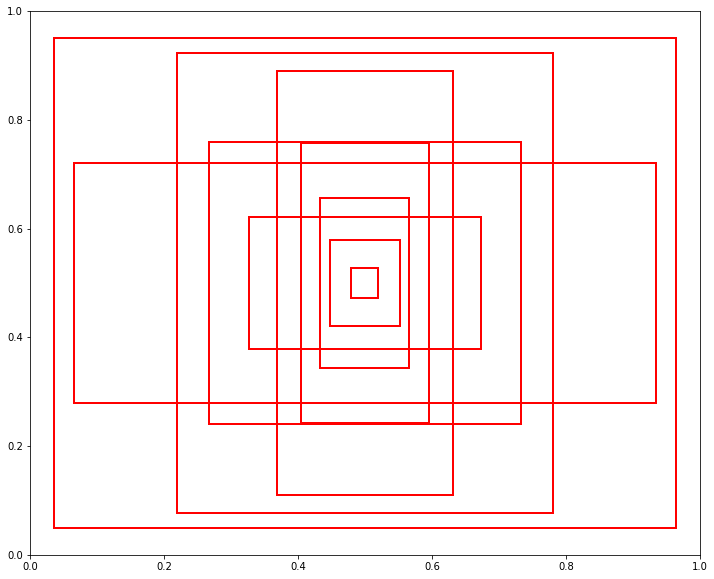

In [9]:
Image("local/imgs/anchor_boxes.png", width=300)

# Task 2: Prepare one image target for training dataset

assume we split images in 11x11 cells, you will have to:

- use image with id `0003bb040a62c86f` (you can find it under `local/imgs`)
- use the anchor boxes obtained in previous exercise
- for each object box in `oidv6-train-annotations-bbox.csv` associated with image `oidv6-train-annotations-bbox.csv`:
    - find the anchor box whose dimensions are closest to the object box
    - find the cell containing the center of the object box.
    - obtain $t_y$, $t_x$, $t_w$, $t_h$ according to the equations in the image below (you will have to invert the equations).
    - obtain the index of the object class according to the [Open Images V6 Dataset](https://storage.googleapis.com/openimages/web/index.html) class descriptions for boxes.
    - create a vector with 605 positions where the first position is 1 ($t_0=1$, signalling there is an object to be detected in that cell and anchor box), the 4 next corresponding to $t_y$, $t_x$, $t_w$, $t_h$, and the 600 next corresponding to the one-hot encoding of the object class index.

- for each cell create a 10x605 matrix corresponding  to the objects detected in that cell for each anchor box.
    - if an anchor box does not correspond to an object, set all components to zero.
    - if an anchor box is responsible for two object box, select either one


. finally, build a 11x11x6050 structure gathering all cells and anchors

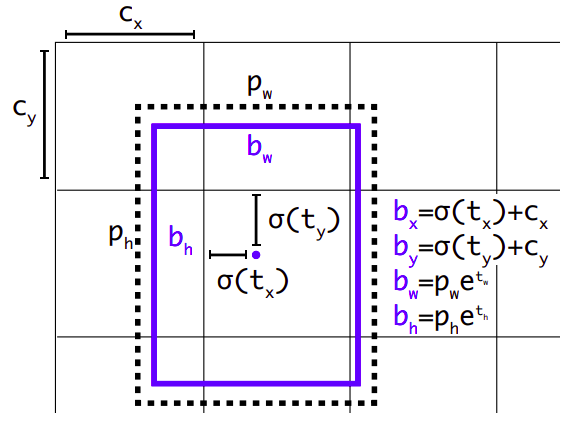

In [22]:
Image("local/imgs/yolo_predictions.png", width=400)

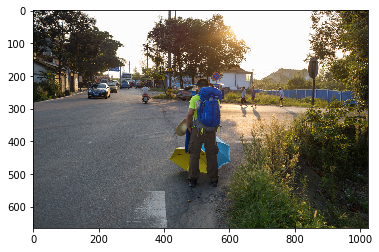

In [20]:
from skimage import io
img = io.imread("local/data/0003bb040a62c86f.jpg")
plt.imshow(img)